# Chapter.6.01 Polynomial Regression
이번 PA 6.01에서는 Polynomial Regression을 진행하는데<br>
Input Data의 크기에 따라서 특정 $\theta$가 Dominant하게 Update되는 것을 확인합니다<br>
모델은 다음과 같이 형성됩니다
$$\hat{y} =\theta_{m}x^m +  \theta_{m-1}x^{m-1} +...+ \theta_{1}x^1 +  \theta_{0}$$

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import basic_nodes as nodes
import affine_MSE
def get_data_batch(dataset, batch_idx, batch_size, n_batch):
    if batch_idx is n_batch -1:
        batch = dataset[batch_idx*batch_size:]
    else:
        batch = dataset[batch_idx*batch_size : (batch_idx+1)*batch_size]
    return batch
plt.style.use('seaborn')
np.random.seed(0)

### Step.1 Dataset Generator
200개의 Data Sample을 생성합니다<br>
Input x_data는 [0.05 ~ 1 - 0.05]의 범위에서 생성합니다(np.linspace 사용)<br>
y_data는 sin함수를 따라서 만들며 x_data를 통한 sin함수에 Noise를 추가합니다<br>
h_oreder는 5차원으로 진행합니다

In [102]:
n_sample = 200
h_order = 5
x_data1 = np.linspace(0.05, 1 - 0.05, n_sample).reshape(-1, 1)
y_data = np.sin(2*np.pi*x_data1) + 0.2*np.random.normal(0, 1, size = (n_sample,1))

x_data = np.zeros(shape = (n_sample, 1))
for order in range(1, h_order + 1):
    order_data = np.power(x_data1, order)
    x_data = np.hstack((x_data, order_data))

data = np.hstack((x_data, y_data))

### Step.2 Parameter 설정
학습에 필요한 Parameter를 설정하고<br>
5장 Multi-Variate-Linear-Regression에서 사용했던<br>
Affine_Function과 MSE_Cost를 import하여 사용합니다<br>

* batch_size = 32
* epochs = 300
* lr = 0.01

In [103]:
batch_size = 32
n_batch = np.ceil(data.shape[0]/batch_size).astype(int)
feature_dim = x_data.shape[1]-1
Th = np.ones(shape = (feature_dim + 1,), dtype = np.float).reshape(-1, 1)

affine = affine_MSE.Affine_Function(feature_dim, Th)
cost = affine_MSE.MSE_Cost()

epochs, lr = 300, 0.01
th_accum = Th.reshape(-1, 1)
cost_list = []

### Step.3 Learning
mini-batch를 통한 Data를 MVLR에서 Learning했던 것과 동일하게<br>
Learning을 진행한다

In [104]:
for epoch in range(epochs):
    np.random.shuffle(data)
    for batch_idx in range(n_batch):
        batch = get_data_batch(data, batch_idx, batch_size, n_sample)
        X, Y = batch[:,:-1], batch[:,-1]
        Pred = affine.forward(X)
        J = cost.forward(Y, Pred)
        
        dPred = cost.backward()
        affine.backward(dPred, lr)
        
        th_accum = np.hstack((th_accum, affine._Th))
        cost_list.append(J)

### Step.4 Visualization

Text(0.5, 1.0, 'Cost')

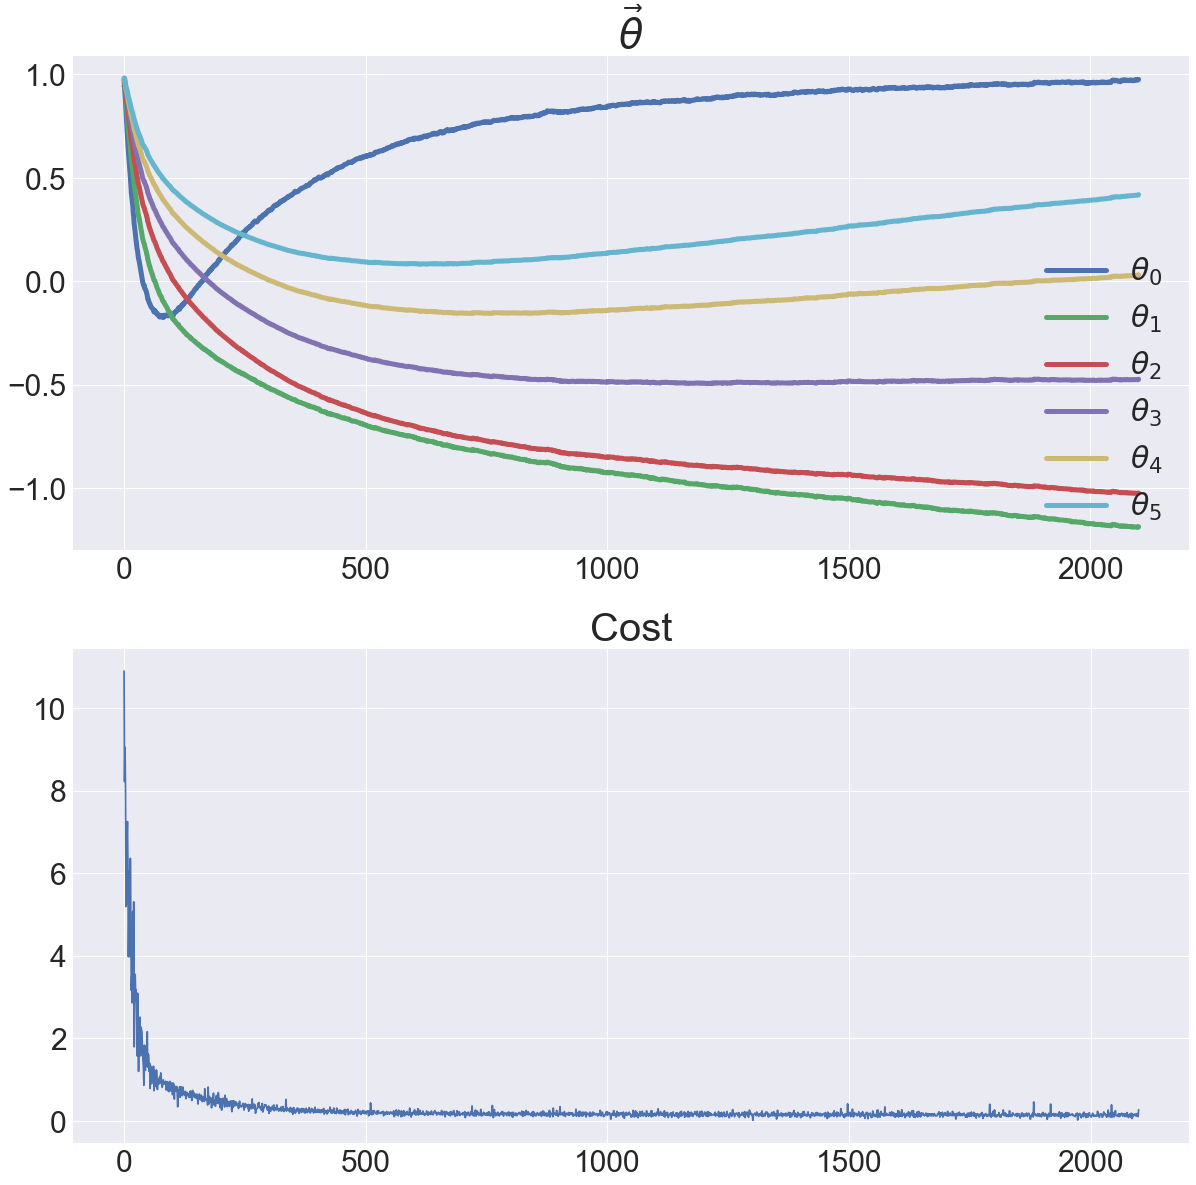

In [105]:
fig, ax = plt.subplots(2, 1, figsize = (20, 20))

for i in range(feature_dim + 1):
    ax[0].plot(th_accum[i], label = r'$\theta_{%d}$'%i,
               linewidth = 5)
ax[1].plot(cost_list)
ax[0].legend(loc = 'lower right',
            fontsize = 30)
ax[0].tick_params(axis = 'both', labelsize = 30)
ax[1].tick_params(axis = 'both', labelsize = 30)

ax[0].set_title(r'$\vec{\theta}$', fontsize = 40)
ax[1].set_title('Cost', fontsize = 40)        

### Step.1 Dataset Generator
이번에는 Dataset Generator할때 [0.05 ~ 1-0.05]가 아닌 [5.05 ~ 6-0.05]에서 진행할 것이다<br>
다른 조건은 동일하게 진행하는데 x_data를 생성할때 linspace의 parameter만 변화시켜준다

In [106]:
n_sample = 200
h_order = 5
x_data1 = np.linspace(2.05, 3 - 0.05, n_sample).reshape(-1, 1)
y_data = np.sin(2*np.pi*x_data1) + 0.2*np.random.normal(0, 1, size = (n_sample,1))

x_data = np.zeros(shape = (n_sample, 1))
for order in range(1, h_order + 1):
    order_data = np.power(x_data1, order)
    x_data = np.hstack((x_data, order_data))

data = np.hstack((x_data, y_data))

### Step.2 Parameter 설정
input data의 크기가 커졌기 때문에<br>
learning rate 또한 같이 감소시켜줘야 한다<br>
* lr = 0.000001

In [107]:
batch_size = 32
n_batch = np.ceil(data.shape[0]/batch_size).astype(int)
feature_dim = x_data.shape[1]-1
Th = np.ones(shape = (feature_dim + 1,), dtype = np.float).reshape(-1, 1)

affine = affine_MSE.Affine_Function(feature_dim, Th)
cost = affine_MSE.MSE_Cost()

epochs, lr = 300, 0.000001
th_accum = Th.reshape(-1, 1)
cost_list = []

### Step.3 Learning

In [108]:
for epoch in range(epochs):
    np.random.shuffle(data)
    for batch_idx in range(n_batch):
        batch = get_data_batch(data, batch_idx, batch_size, n_sample)
        X, Y = batch[:,:-1], batch[:,-1]
        Pred = affine.forward(X)
        J = cost.forward(Y, Pred)
        
        dPred = cost.backward()
        affine.backward(dPred, lr)
        
        th_accum = np.hstack((th_accum, affine._Th))
        cost_list.append(J)

### Step.4 Visualization

Text(0.5, 1.0, 'Cost')

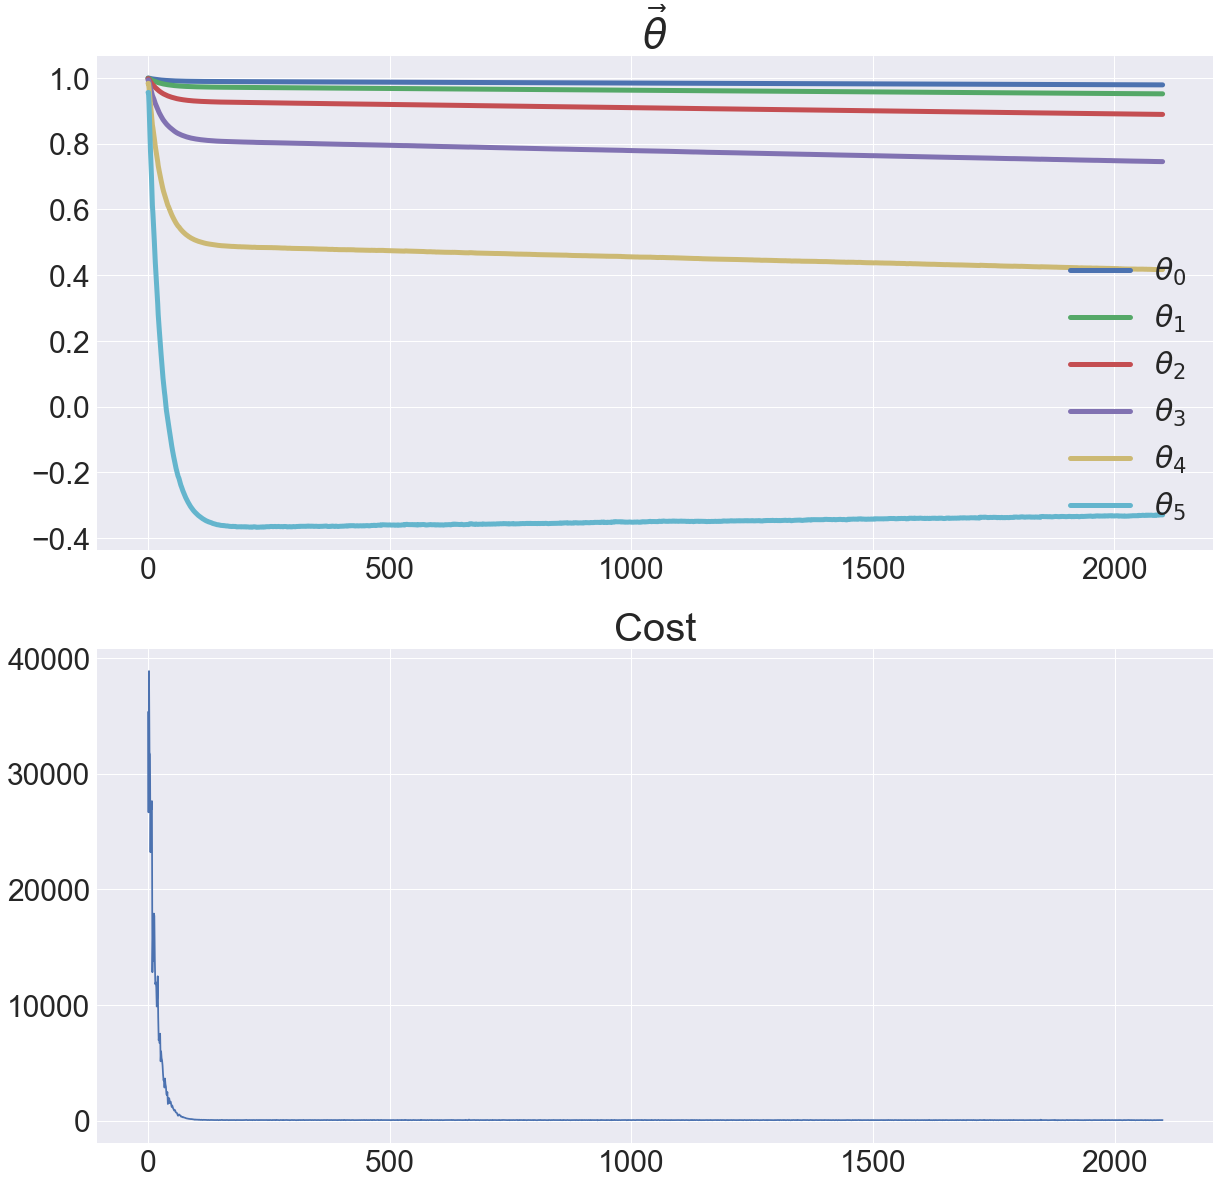

In [109]:
fig, ax = plt.subplots(2, 1, figsize = (20, 20))

for i in range(feature_dim + 1):
    ax[0].plot(th_accum[i], label = r'$\theta_{%d}$'%i,
               linewidth = 5)
ax[1].plot(cost_list)
ax[0].legend(loc = 'lower right',
            fontsize = 30)
ax[0].tick_params(axis = 'both', labelsize = 30)
ax[1].tick_params(axis = 'both', labelsize = 30)

ax[0].set_title(r'$\vec{\theta}$', fontsize = 40)
ax[1].set_title('Cost', fontsize = 40)        

m차원의 input Dataset에 대해서 learning을 하게 되면<br>
$\frac{\partial L}{\partial \theta_{m}} = -2x^m(\theta_{m}x^m +  \theta_{m-1}x^{m-1} +...+ \theta_{1}x^1 +  \theta_{0})$가 된다<br>
따라서 처음에 Input Data의 크기를 [0.05 ~ 1-0.05]로 제한했을 때는<br>
$\theta$들이 비슷하게 학습 되는 것을 볼수 있고<br>
Input Data의 크기를 1보다 크게 증가시키게 되면 $\theta_{m}$이 Dominant하게 학습되는 것을 확인할 수 있다